## Regresão Linear - Titanic

### Exemplo extraído do livro Artificial Unintelligence, Broussard, Merdith

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
from google.colab import files
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [12]:
# train and test files provided by AWS
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [9]:
# Head
print(train.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


## Data dictionary


*   Pclass = Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)
*   Survived = Survival (0 = No; 1 = Yes)
*   Name = Name
*   Sex = Sex
*   Age = Age (in years; Fractional if age less than on (1). If the age is estimates, it is in the form xx.5)
*   Sibsp = Number of Simblings/Spouses Aboard
*   Parch = Number of Parents/Children Aboard
*   Ticket = Ticket Number
*   Fare = Passenger Fare (pre-1970 British Pound)
*   Cabin = Cabin Number
*   Embarked = Port of Embarkation (C = Chersbourgh; Q = Queenstown; S = Southampton)

In [11]:
# Sample test
print(test.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [14]:
#Describing variables
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


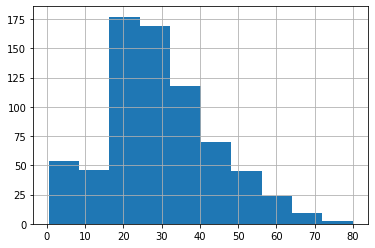

In [17]:
train['Age'].hist()

In [19]:
# Counting class passengers
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
# Passengers that survides vs passengers that passed away
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
# As proportions
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
# "Woman and Children First - HSM Birkenhead"

In [30]:
# Males that survides vs males that passed away
train['Survived'][train['Sex']=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [32]:
# Females that survides vs females that passed away
train['Survived'][train['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [33]:
# Normalized male survival
train['Survived'][train['Sex']=='male'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [34]:
# Normalized female survival
train['Survived'][train['Sex']=='female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [36]:
# Adjust Age variable put median on Na samples
train['Age'] = train['Age'].fillna(train['Age'].median())

In [38]:
# Print the train data to see the available features 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
##
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
# Create the target and feature numpy array: target, features_one
target = train['Survived'].values

In [65]:
# Preprocess
encoded_sex = preprocessing.LabelEncoder()

In [69]:
# Convert into numbers
train.Sex = encoded_sex.fit_transform(train.Sex)
features_one = train[['Pclass','Sex','Age','Fare']].values

In [58]:
type(train.Sex)

pandas.core.series.Series

In [70]:
# Fit the first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

In [71]:
# Look ate the importance and score of the included features
my_tree_one.feature_importances_

array([0.12734252, 0.31274009, 0.23960777, 0.32030963])

In [72]:
# Score
my_tree_one.score(features_one, target)

0.9775533108866442

In [75]:
# Fill the missing values with the median fare
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [76]:
# Fill any mssing Age values with the median
test['Age'] = test['Age'].fillna(test['Age'].median())

In [78]:
# Preprocess
test_encoded_sex = preprocessing.LabelEncoder()
test.Sex = test_encoded_sex.fit_transform(test.Sex)

In [90]:
# Extract inmportant the test set: Pclass, Age, Sex and Fare
test_features = test[['Pclass', 'Sex', 'Age', 'Fare']].values
print(f'These are the features:{test_features}')

These are the features:[[ 3.      1.     34.5     7.8292]
 [ 3.      0.     47.      7.    ]
 [ 2.      1.     62.      9.6875]
 ...
 [ 3.      1.     38.5     7.25  ]
 [ 3.      1.     27.      8.05  ]
 [ 3.      1.     27.     22.3583]]


In [91]:
# Make prediction using the test set and print
my_prediction = my_tree_one.predict(test_features)
print(f'This is the prediction: \n {my_prediction}')

This is the prediction: 
 [0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [97]:
# Create a data frame with two columns: Passenger Id & Survived
# Survide contain the models prediction
PassengerId = np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ['Survived'])
my_solution

,Survived
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0
1308,0


In [98]:
# Check that the data frame has 418 entries
my_solution.shape

(418, 1)

In [100]:
# Write the soluntion into a CSV file with the name my_solution.csv 
my_solution.to_csv("my_solution_one.csv", index_label = ['PassengerId'])

In [101]:
# Download results
files.download("my_solution_one.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>